#### Crear un sistema que almacene equipos biomédicos , cada equipo tiene información de nombre, marca, ubicación, fecha de calibración ,fecha de mmto ,nombre del proveedor. Para ello implementarlo a partir de un dataframe con la información anterior

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Dataframe
columnas = {"Nombre": pd.Series([], index=[]),
    "Marca": pd.Series([], index=[]),
    "Ubicación": pd.Series([], index=[]),
    "Fecha de calibración": pd.Series([], index=[]),
    "Fecha de mantenimiento": pd.Series([], index=[]),
    "Proveedor": pd.Series([], index=[])}


equiposDF = pd.DataFrame(columns=columnas)

class Registro:
    def __init__(self):
        self.__id = ""
        self.__nombre = ""
        self.__marca = ""
        self.__ubi = ""
        self.__cal = ""
        self.__man = ""
        self.__pro = ""

    def verID(self):
        return self.__id
    def verNombre(self):
        return self.__nombre
    def verMarca(self):
        return self.__marca
    def verUbi(self):
        return self.__ubi
    def verCal(self):
        return self.__cal
    def verMan(self):
        return self.__man
    def verPro(self):
        return self.__pro
    
    def añadirID(self,id):
        self.__id = id
    def añadirNombre(self,nombre):
        self.__nombre = nombre
    def añadirMarca(self,marca):
        self.__marca = marca
    def añadirUbi(self,ubi):
        self.__ubi = ubi
    def añadirCal(self,cal):
        self.__cal = cal
    def añadirMan(self,man):
        self.__man = man
    def añadirPro(self,pro):
        self.__pro = pro

    def añadirDF(self, id,nombre,marca,ubi,cal,man,pro):
        equiposDF["Nombre"]=pd.Series([nombre], index=[id])
        equiposDF["Marca"]=pd.Series([marca], index=[id])
        equiposDF["Ubicación"]=pd.Series([ubi], index=[id])
        equiposDF["Fecha de calibración"]=pd.Series([cal], index=[id])
        equiposDF["Fecha de mantenimiento"]=pd.Series([man], index=[id])
        equiposDF["Fecha de calibración"]=pd.Series([cal], index=[id])
        equiposDF["Proveedor"]=pd.Series([pro], index=[id])

while True:
    op = input('''
1. Añadir nuevo registro
2. Eliminar registro
3. Modificar registro
4. Ver todos los registros
5. Salir
               >''')
    if op == "1":
        id = input("ID: ")
        nombre = input("Nombre: ")
        marca = input("Marca: ")
        ubi = input("Ubicación: ")
        cal = input("Fecha de calibración: ")
        man = input("Fecha de mantenimiento: ")
        pro = input("Proveedor: ")
        reg = Registro()
        reg.añadirID(id)
        reg.añadirNombre(nombre)
        reg.añadirMarca(marca)
        reg.añadirUbi(ubi)
        reg.añadirCal(cal)
        reg.añadirMan(man)
        reg.añadirPro(pro)
        reg.añadirDF(id,nombre,marca,ubi,cal,man,pro)
    if op == "4":
        print(equiposDF)
    if op == "5":
        break

  Nombre Marca Ubicación Fecha de calibración Fecha de mantenimiento Proveedor
1   lala     q      aqui                   si                     no       yto


#### De la siguiente pagina: https://www.kaggle.com/datasets/imdevskp/corona-virusreport?select=covid_19_clean_complete.csv
#### Extraer el datasets de datos , leer y analizarlos , mirar como pueden ser agrupados y que información podría mostra según sus columnas, mirar promedio , desviación estándar,etc

In [5]:
df = pd.read_csv("archive/covid_19_clean_complete.csv")

In [8]:
print(f"Forma {df.shape}")
print(f"Tamaño {df.size}")
print(f"Dimensiones {df.ndim}")


Forma (49068, 10)
Tamaño 490680
Dimensiones 2


In [10]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df[['Confirmed', 'Deaths', 'Recovered']].describe()



,Confirmed,Deaths,Recovered
count,4.906800e+04,49068.000000,4.906800e+04
mean,1.688490e+04,884.179160,7.915713e+03
std,1.273002e+05,6313.584411,5.480092e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,4.000000e+00,0.000000,0.000000e+00
50%,1.680000e+02,2.000000,2.900000e+01
75%,1.518250e+03,30.000000,6.660000e+02
max,4.290259e+06,148011.000000,1.846641e+06


In [21]:
country_stats = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].agg(['mean', 'std', 'max'])
country_stats.head()

Confirmed                           Deaths              \
                        mean           std    max        mean         std   
Country/Region                                                              
Afghanistan     10299.946809  13458.792417  36263  261.159574  376.417160   
Albania          1046.287234   1264.372255   4880   30.361702   33.482808   
Algeria          6275.292553   7339.328093  27973  414.744681  387.420178   
Andorra           502.148936    371.460824    907   28.845745   23.277049   
Angola            120.542553    214.148815    950    5.734043    9.326720   

                        Recovered                      
                 max         mean          std    max  
Country/Region                                         
Afghanistan     1269  4245.957447  7723.942474  25198  
Albania          144   632.324468   732.715122   2745  
Algeria         1163  4020.728723  5186.080994  18837  
Andorra           52   367.414894   349.769547    803  
Angola            41    34.962766    59.577063    242

In [26]:
e = df['Confirmed']
type(e)
e

0           0
1           0
2           0
3           0
4           0
         ... 
49063     865
49064    1691
49065     354
49066    7235
49067     505
Name: Confirmed, Length: 49068, dtype: int64

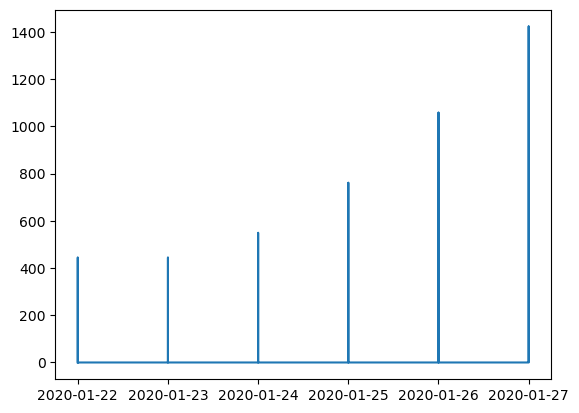

In [36]:
plt.plot(df['Date'][:1500],df['Confirmed'][:1500])

In [38]:
latest_date = df['Date'].max()

latest_data = df[df['Date'] == latest_date]

country_latest = latest_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

country_latest = country_latest.sort_values(by='Confirmed', ascending=False)

print(country_latest.head(10))


     Country/Region  Confirmed  Deaths  Recovered
173              US    4290259  148011    1325804
23           Brazil    2442375   87618    1846641
79            India    1480073   33408     951166
138          Russia     816680   13334     602249
154    South Africa     452529    7067     274925
111          Mexico     395489   44022     303810
132            Peru     389717   18418     272547
35            Chile     347923    9187     319954
177  United Kingdom     301708   45844       1437
81             Iran     293606   15912     255144


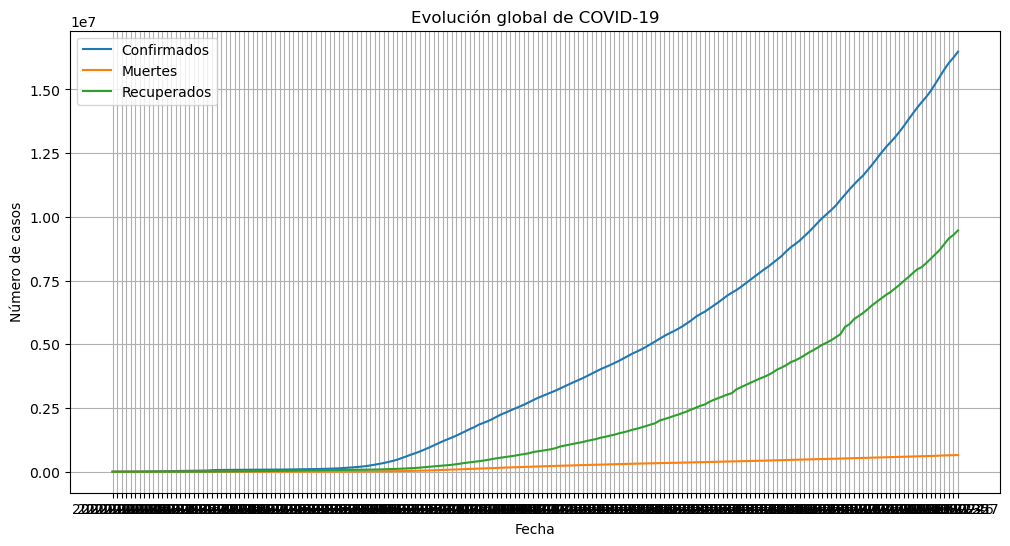

In [39]:
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_trends['Date'], global_trends['Confirmed'], label='Confirmados')
plt.plot(global_trends['Date'], global_trends['Deaths'], label='Muertes')
plt.plot(global_trends['Date'], global_trends['Recovered'], label='Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.title('Evolución global de COVID-19')
plt.legend()
plt.grid(True)
plt.show()
